In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def obj_func(m):
    u, s, vh = np.linalg.svd(m)

    return np.sum(s[1:])

epsilon = 1#1e-10

def comp_grad(m, boolMask, obj_func, n, epsilon=epsilon):
    """ Computes gradient that maximizes the objective function """

    # Yes, grad is a vector now
    grad = []

    for i in range(n):
        for j in range(n):
            if boolMask[i,j]:
                diff = np.zeros([n,n])
                diff[i,j] = epsilon
                grad.append((obj_func(m + diff) - obj_func(m - diff))/(2*epsilon))

    return grad

def comp_hessian(m, boolMask, of, n, epsilon=epsilon):
    """ Computes hessian (only diagonal) """
    vector = []

    for i in range(n):
        for j in range(n):
            if boolMask[i,j]:
                vector.append(m[i,j])

    q = len(vector)
    hessian = np.zeros([q, q])

    # fill in the diagonal first
    count = 0
    for i in range(n):
        for j in range(n):
            if boolMask[i,j]:

                diff = np.zeros([n,n])
                diff[i,j] = epsilon
                hessian[count,count] = (of(m + diff) + of(m - diff) - 2*of(m))/epsilon**2

                count = count + 1
                
    # now fill in off-diagonals
    count1 = 0
    for i1 in range(n):
        for j1 in range(n):
            if boolMask[i1,j1]: # found one
                diff1 = np.zeros([n,n])
                diff1[i1,j1] = epsilon

                count2 = 0
                for i2 in range(n):
                    for j2 in range(n):
                        if boolMask[i2,j2]: # found another one
                            diff2 = np.zeros([n,n])
                            diff2[i2,j2] = epsilon

                            if count1 != count2: # doing only off-diagonal ones
                                hessian[count1,count2] = (of(m + diff1 + diff2) + of(m - diff1 - diff2)
                                                         - of(m + diff1 - diff2) - of(m - diff1 + diff2))/(2*epsilon)**2

                            count2 = count2 + 1

                count1 = count1 + 1

    return hessian

In [4]:
n = 10
p = 0.5
rank = 1

U = np.random.randn(n, rank)
V = np.random.randn(n, rank)
original = np.dot(U, V.T)
mask = np.random.choice([0, 1], size=(n,n), p=[1-p, p])

boolMask = np.ma.make_mask(np.where(np.array(mask) < 0.5, 1, 0))

In [5]:
current_point = np.copy(original)

zeros = np.zeros([n,n])
current_point[boolMask] = zeros[boolMask]

print("step, nuc norm, frob distance, hessian cond")#, grad mean, grad std, grad min, grad max")
nuc_norms = []
frob_norms = []
conds = []

for step in range(10000):

    hessian = comp_hessian(current_point, boolMask, obj_func, n)
    grad = comp_grad(current_point, boolMask, obj_func, n)

    #descent = -np.dot(np.linalg.inv(hessian), grad)
    descent = -np.array(grad)
    
    descent_matrix = np.zeros([n,n])
    count = 0
    for i in range(n):
        for j in range(n):
            if boolMask[i,j]:
                descent_matrix[i,j] = descent[count]
                count = count + 1
    
    current_point = current_point + 0.1*descent_matrix
    
    nuc_norms.append(np.linalg.norm(current_point,'nuc'))
    frob_norms.append(np.linalg.norm(current_point-original,'fro'))
    conds.append(np.linalg.cond(hessian))
    
    if step % 20 == 0:
        print(step, np.linalg.norm(current_point,'nuc'), np.linalg.norm(current_point-original,'fro'),
              np.linalg.cond(hessian))#, np.mean(np.abs(grad)),
             # np.std(np.abs(grad)), np.min(np.abs(grad)), np.max(np.abs(grad)))
    

step, nuc norm, frob distance, hessian cond
0 8.677290348008324 5.5852231009443365 52.06074170560928
20 7.306659651917826 4.22932707000902 31.93513283984
40 7.047022862499502 3.2002548733418195 94.01624721645447
60 7.0620174875709765 2.4060417970823056 68.7745546135377
80 7.1312783545102905 1.8164381559094962 88.03186293257393
100 7.20037387388946 1.2862669997337295 221.01804067935254
120 7.246377591544194 0.8214309576205219 2029.5766044358402
140 7.362841718323906 0.46149725484541604 89.2506539402268
160 7.483539023775202 0.22486631717343256 409.933171722096
180 7.54636690104708 0.1690843899365607 58.099544845617785
200 7.553053339054692 0.1644099915144394 158.7611968400366
220 7.557170223327457 0.16089173290135558 89.44316051174539
240 7.563168765020442 0.15906408481118164 36.00494530469314
260 7.569223688023884 0.15813322759934897 602.4001274797207
280 7.574720196236376 0.1569589843024161 80.634373554405
300 7.5770632042476205 0.15625009574050902 3586.4268922294705
320 7.57831798248

KeyboardInterrupt: 

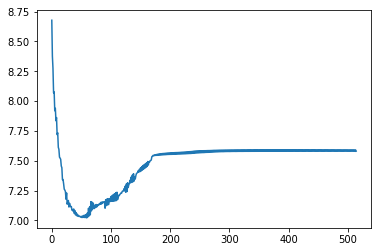

In [6]:
plt.plot(nuc_norms)

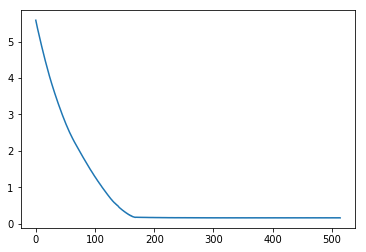

In [7]:
plt.plot(frob_norms)

## Actually use Hessian

In [15]:
current_point = np.copy(original)

zeros = np.zeros([n,n])
current_point[boolMask] = zeros[boolMask]

print("step, nuc norm, frob distance, hessian cond")#, grad mean, grad std, grad min, grad max")
nuc_norms = []
frob_norms = []
conds = []

for step in range(10000):

    hessian = comp_hessian(current_point, boolMask, obj_func, n)
    grad = comp_grad(current_point, boolMask, obj_func, n)

    descent = -np.dot(np.linalg.inv(hessian), grad)
    #descent = -np.array(grad)
    
    descent_matrix = np.zeros([n,n])
    count = 0
    for i in range(n):
        for j in range(n):
            if boolMask[i,j]:
                descent_matrix[i,j] = descent[count]
                count = count + 1
    
    current_point = current_point + 0.01*descent_matrix
    
    nuc_norms.append(np.linalg.norm(current_point,'nuc'))
    frob_norms.append(np.linalg.norm(current_point-original,'fro'))
    conds.append(np.linalg.cond(hessian))
    
    #if step % 20 == 0:
    print(step, np.linalg.norm(current_point,'nuc'), np.linalg.norm(current_point-original,'fro'),
              np.linalg.cond(hessian))#, np.mean(np.abs(grad)),
             # np.std(np.abs(grad)), np.min(np.abs(grad)), np.max(np.abs(grad)))
    

step, nuc norm, frob distance, hessian cond
0 8.715490249714447 5.566421443131387 125.57982363262606
1 9.134059175097343 6.0414721529346185 1972.9778975348083
2 8.57546299096304 4.933775780342499 991.3497627462242
3 8.544944044234391 4.9335653630812155 73.0011369697853
4 8.51809739794737 4.938822229764519 80.23924123187568
5 8.494413581083139 4.949506245053991 89.12533199551797
6 8.473624473357175 4.965987896749962 100.60534326237924
7 8.455681049216645 4.989223494230043 116.4369386727495
8 8.440836423774709 5.021301677800412 140.4346051806026
9 8.430001095740224 5.067251531412074 182.9541049372928
10 8.42674894317975 5.144478434868468 288.2055982041823
11 8.51348402541267 5.6002185115247824 1627.1004249464472
12 8.493751392515092 5.5839622309025 61.352884118093385
13 8.474862219776137 5.568188575368235 58.78357958162803
14 8.456736215387235 5.552858644758918 56.46982203311705
15 8.439305400868749 5.537938862483557 54.369943866482146
16 8.422511431955547 5.523399119629408 52.4531022930

142 7.551807081420656 4.2104939138915665 14.422169163823996
143 7.54783083542677 4.199346776294097 14.349677532308842
144 7.543874831171344 4.188181492087589 14.277507029007097
145 7.539939017415441 4.176998689790777 14.205651376817453
146 7.5360233468349 4.1657990060696095 14.134106848709962
147 7.532127785746554 4.154583093886151 14.06287271790205
148 7.528252299649596 4.1433516126407115 13.991949258659902
149 7.524396857426697 4.132105229743289 13.921332869587365
150 7.520561434276211 4.12084462737 13.851019471500706
151 7.5167460083206 4.109570498803555 13.781012246776168
152 7.512950560623562 4.098283548097019 13.711309173333621
153 7.509175073653905 4.086984486623685 13.641913006126229
154 7.505419531579766 4.075674025564758 13.57284034387338
155 7.501683924054845 4.064352903637618 13.504075091339361
156 7.497968244902366 4.053021872380523 13.435617706191488
157 7.494272490543556 4.041681704043309 13.367466189257204
158 7.490596657498582 4.030333172275461 13.299627787232534
159 7

282 7.182715663400836 2.743048836824795 7.7396351249030815
283 7.181289393507511 2.7345005345449636 7.713310625333958
284 7.179876836271104 2.7259868917411874 7.687151304344889
285 7.178477904601407 2.717507895221329 7.661154406000626
286 7.177092511716659 2.709063529045088 7.635317196723254
287 7.175720569469531 2.7006537749105903 7.609636959225214
288 7.174361991452584 2.692278612641582 7.584111007352398
289 7.173016690970061 2.6839380195569187 7.558736786391128
290 7.1716845815979635 2.6756319709037504 7.533511650245082
291 7.170365577225821 2.667360439738125 7.508433033508402
292 7.169059591457234 2.659123396767061 7.483498449415409
293 7.167766538417677 2.6509208107273166 7.458705410315622
294 7.166486332023036 2.642752647874963 7.4340522874005055
295 7.165218886231079 2.634618872707724 7.409545636446302
296 7.163964114933713 2.6265194476456313 7.385173435804727
297 7.162721932407144 2.6184543333365986 7.36093329851611
298 7.1614922532266165 2.610423488576997 7.336822925149942
299

422 7.081175915298324 1.856399933790973 4.9404785180456745
423 7.080935102848619 1.8520615159060239 4.92406112101132
424 7.0806984605503756 1.8477484048726391 4.907693026381336
425 7.080465961852888 1.8434605268589228 4.891371022779943
426 7.080237578360704 1.8391978368681057 4.875096100847783
427 7.08001326706074 1.834960252502622 4.8588717446967085
428 7.079792997102273 1.830747687065981 4.842674392525911
429 7.079576709667937 1.8265600273612308 4.826531171525867
430 7.079364386190088 1.822397148287503 4.810469120825375
431 7.079155999410931 1.818258952906297 4.794486417339009
432 7.078954970681958 1.8141453892813106 4.778590502728631
433 7.078760112171338 1.8100562032809984 4.762904625635926
434 7.0785691202065735 1.805991150324728 4.7473281026594725
435 7.078381982085159 1.801950047609314 4.7317426042665165
436 7.078198698034082 1.7979326974413663 4.716059901148911
437 7.0780192654877565 1.793938889848714 4.700262621914131
438 7.077843670176013 1.7899684837161431 4.68437756913434
4

561 7.0798471891726225 1.4456600632198289 3.213154965911939
562 7.080017299580421 1.4436879711593755 3.206645687001363
563 7.080189318075191 1.4417244396584705 3.2002010050568743
564 7.080363230345022 1.439769388345886 3.193820201682679
565 7.080539022065403 1.4378227378529174 3.187502549541193
566 7.080716678929935 1.4358844097868517 3.1812473262890637
567 7.080896186597119 1.433954326721058 3.175053816931984
568 7.081077530732539 1.432032412185211 3.1689213172902466
569 7.0812606969998715 1.4301185906542475 3.1628491298881594
570 7.0814456709051035 1.42821278798751 3.1568363742612107
571 7.081632437876021 1.426314931225683 3.1508822563165375
572 7.081820983538611 1.424424947527317 3.1449864240646503
573 7.0820112935161115 1.4225427649426523 3.139148210408213
574 7.082203353448929 1.4206683124114783 3.133366959325574
575 7.082397148935672 1.4188015197345087 3.12764201938051
576 7.082592665569843 1.4169423175552767 3.121972742558053
577 7.082789888957524 1.4150906373613652 3.1163584892

700 7.115887690209127 1.2291093559664175 2.703245402271711
701 7.1161990454763595 1.2278456446590058 2.701347176199045
702 7.116510687715587 1.2265848702306739 2.6994639000481477
703 7.116822609497344 1.2253270140294552 2.6975954410328487
704 7.117134803496959 1.2240720575898547 2.695741661378325
705 7.117447262645275 1.2228199827070185 2.693902425197963
706 7.1177599799376265 1.2215707713290698 2.692077603939969
707 7.118072948436869 1.2203244055715021 2.690267062156461
708 7.118386161272272 1.2190808677143918 2.68847066831292
709 7.118699611639301 1.217840140193614 2.6866882954999984
710 7.119013292819857 1.2166022056025672 2.6849198129585834
711 7.119327198137045 1.2153670466989706 2.683165054861146
712 7.119641320972861 1.2141346463756004 2.681423942584179
713 7.119955654785924 1.2129049876698137 2.679696360891192
714 7.120270193091311 1.2116780537723328 2.677982179148391
715 7.120584929455052 1.210453828021591 2.6762812719857187
716 7.120899857498576 1.209232293895037 2.6745935237

KeyboardInterrupt: 

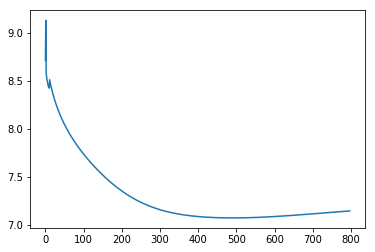

In [16]:
plt.plot(nuc_norms)

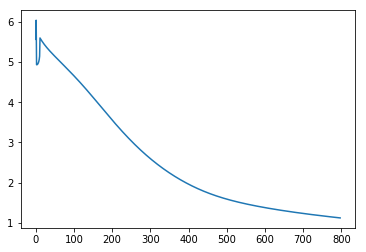

In [17]:
plt.plot(frob_norms)

Overall, newton method doesn't seem to perform very well